#  k-Nearest Neighbors algorithm

For further reading this tutorial is recomended

http://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/'

First we will generate random numbers with very simple differences, and use them to understand KNN. The data will overlap, but we hope to find a clear tendency.

<img src="https://upload.wikimedia.org/wikipedia/en/c/c1/Return_to_Plain_Awful_-_Huey_Dewey_and_Louie.jpg">

We will model Huey, Dewey and Louie - who share a room for at any point in time does have an afinity to stay close to their own bed.


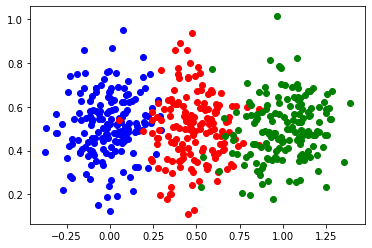

In [1]:
import numpy
import matplotlib.pyplot as plt

data = numpy.zeros((500,3))
data[:,0] = numpy.random.choice([-0.5, 0.0, 0.5],size=500)
data[:, 1:] = numpy.random.normal(0.5, 0.15, (500,2))

#Structure data in label and positions
labels = data[:, 0]
position = data[:, 1:]

#Introduce bias to data
position[:, 0] += labels

#Views for nicer viewing
huey =  position[labels == -0.5]
dewey = position[labels ==  0.0]
louie = position[labels ==  0.5]

plt.plot(huey[:, 0], huey[:, 1]  , 'bo')
plt.plot(dewey[:,0], dewey[:, 1] , 'ro')
plt.plot(louie[:,0], louie[:, 1] , 'go')
plt.show()

Now we can easily make a function that finds the euclidean distance between a new point and all points in the room.

In [2]:
def all_dist(observation, data):
    return numpy.sqrt((data[:, 0] - observation[0])**2 + (data[:, 1] - observation[1])**2)

In [3]:
distances = all_dist((0,0), position)
votes = []
for _ in range(5):
    winner = numpy.argmin(distances)
    votes.append(labels[winner])
    distances[winner] = 1000 #Just set so high that it cannot win again
print(votes)

[-0.5, -0.5, -0.5, -0.5, -0.5]


In [4]:
import collections
winner = collections.Counter(votes).most_common(1)[0][0] #Counter returns a list of tuples
if winner == -0.5:
    print('I guess Huey')
elif winner == 0.0:
    print('I guess Dewey')
elif winner == 0.5:
    print('I guess Louie')

I guess Huey


Lets produce a set of random Dewey positions and see how well we fare.

In [5]:
wrong = 0
for _ in range(100):
    distances = all_dist(numpy.random.normal(0.5, 0.15, 2), position)
    votes = []
    for _ in range(5):
        winner = numpy.argmin(distances)
        votes.append(labels[winner])
        distances[winner] = 1000 #Just set so high that it cannot win again
    winner = collections.Counter(votes).most_common(1)[0][0] #Counter returns a list of tuples
    if winner != 0.0:
        wrong += 1
print('Got it wrong in',wrong,'cases of 100')

Got it wrong in 13 cases of 100


So obviously, while we should get most correct classifications, the afinity of our ducklings is not sufficient to get it right every time.